# ssim calculator  

this notebook calculates ssim scores from a set of images.

In [1]:
#!/usr/bin/env python3
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import numpy as np
np.set_printoptions(threshold=np.nan)
import tensorflow as tf
import time
import pandas as pd
import matplotlib.pyplot as plt
import progressbar

In [18]:
def calculate_ssim(window_orig, window_recon):
    k_1, k_2, L = 0.01, 0.03, 255
    if window_orig.shape != (11,11) or window_recon.shape != (11,11):
        raise ValueError('please check window size for SSIM calculation!')
    orig_data, recon_data = window_orig.flatten(), window_recon.flatten()
    mean_x, mean_y = np.mean(orig_data), np.mean(recon_data)
    var_x, var_y = np.var(recon_data), np.var(orig_data)
    covar = np.cov(orig_data, recon_data)[0][1]
    c_1, c_2 = (L*k_2)**2, (L*k_1)**2
    num = (2*mean_x*mean_y+c_1)*(2*covar+c_2)
    den = (mean_x**2+mean_y**2+c_1)*(var_x+var_y+c_2)
    return num/den

In [7]:
image_dim, result_dim, filter_dim = 96, 86, 11
train_size, test_size = 500, 140

In [12]:
# data input
data_path = 'https://raw.githubusercontent.com/michaelneuder/image_quality_analysis/master/data/sample_data/'

# train data --- 500 images, 96x96 pixels
orig_500_raw = pd.read_csv('{}orig_500.txt'.format(data_path), header=None, delim_whitespace = True)
recon_500_raw = pd.read_csv('{}recon_500.txt'.format(data_path), header=None, delim_whitespace = True)

# test data --- 140 images, 96x96 pixels
orig_140_raw = pd.read_csv('{}orig_140.txt'.format(data_path), header=None, delim_whitespace = True)
recon_140_raw = pd.read_csv('{}recon_140.txt'.format(data_path), header=None, delim_whitespace = True)

In [13]:
# reshape
orig_500 = np.reshape(orig_500_raw.values, (train_size, image_dim, image_dim))
recon_500 = np.reshape(recon_500_raw.values, (train_size, image_dim, image_dim))
orig_140 = np.reshape(orig_140_raw.values, (test_size, image_dim, image_dim))
recon_140 = np.reshape(recon_140_raw.values, (test_size, image_dim, image_dim))

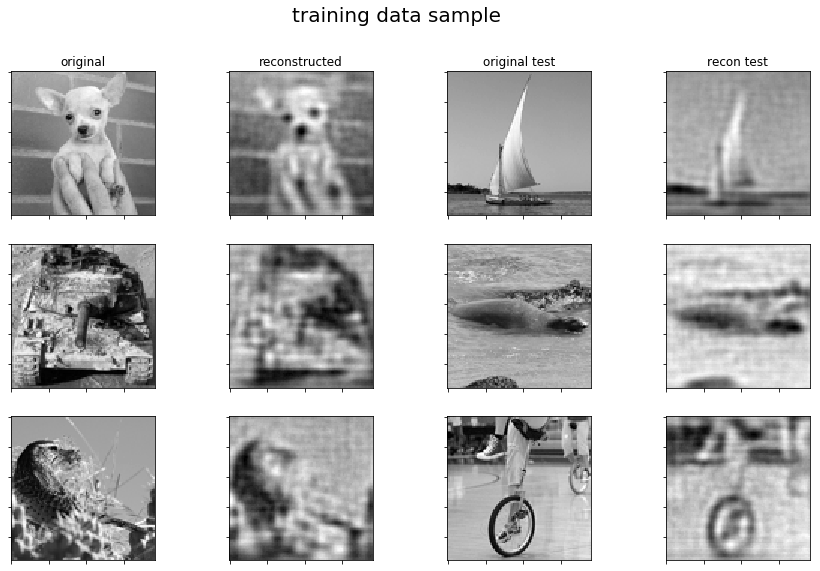

In [15]:
# make sure pictures look right
f, axarr = plt.subplots(nrows=3,ncols=4, figsize=(15,9))
for i in range(3):
    index = np.random.randint(140)
    axarr[i,0].imshow(orig_500[index,:,:], cmap='gray')
    axarr[i,1].imshow(recon_500[index,:,:], cmap='gray')
    axarr[i,2].imshow(orig_140[index,:,:], cmap='gray')
    axarr[i,3].imshow(recon_140[index,:,:], cmap='gray')

axarr[0,0].set_title('original')
axarr[0,1].set_title('reconstructed')
axarr[0,2].set_title('original test')
axarr[0,3].set_title('recon test')
for ax_row in axarr:
    for ax in ax_row:
        ax.set_xticklabels([])
        ax.set_yticklabels([])

f.suptitle('training data sample', size=20)
plt.show()

In [20]:
# ssim params
ssim_res = []
test_image_orig, test_image_recon = orig_500[0], recon_500[0]
number_windows = image_dim - filter_dim + 1
for i in range(number_windows):
    for j in range(number_windows):
        orig_window = test_image_orig[i:i+11, j:j+11]
        recon_window = test_image_recon[i:i+11, j:j+11]
        temp = calculate_ssim(orig_window, recon_window)
        ssim_res.append(temp)
ssim_res = np.reshape(np.asarray(ssim_res), (result_dim, result_dim))

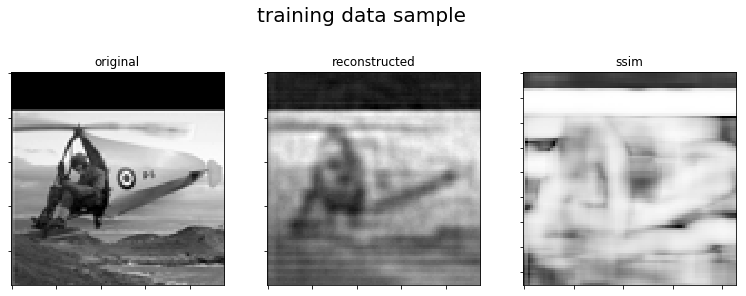

In [25]:
# make sure pictures look right
f, axarr = plt.subplots(nrows=1,ncols=3, figsize=(13,5))

axarr[0].imshow(test_image_orig, cmap='gray')
axarr[1].imshow(test_image_recon, cmap='gray')
axarr[2].imshow(ssim_res, cmap='gray')

axarr[0].set_title('original')
axarr[1].set_title('reconstructed')
axarr[2].set_title('ssim')
for ax in axarr:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

f.suptitle('training data sample', size=20)
plt.show()

In [32]:
# train target --- 500 images, 86x86 pixels (dimension reduction due no zero padding being used)
ssim_500 = pd.read_csv('{}ssim_500_new.csv'.format(data_path), header=None).values
ssim_140 = pd.read_csv('{}ssim_140_new.csv'.format(data_path), header=None).values

In [33]:
ssim_500 = np.reshape(ssim_500, (train_size, result_dim, result_dim))
ssim_140 = np.reshape(ssim_140, (test_size, result_dim, result_dim))

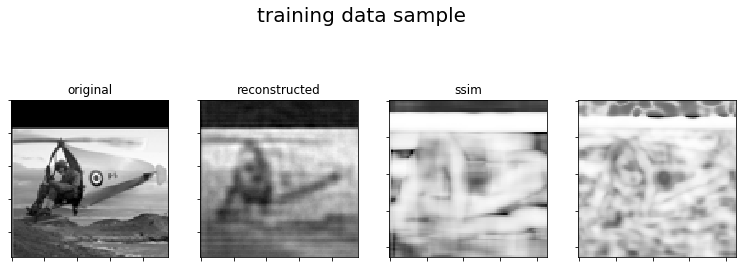

In [34]:
# make sure pictures look right
f, axarr = plt.subplots(nrows=1,ncols=4, figsize=(13,5))

axarr[0].imshow(test_image_orig, cmap='gray')
axarr[1].imshow(test_image_recon, cmap='gray')
axarr[2].imshow(ssim_res, cmap='gray')
axarr[3].imshow(ssim_500[0], cmap='gray')

axarr[0].set_title('original')
axarr[1].set_title('reconstructed')
axarr[2].set_title('ssim')
for ax in axarr:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

f.suptitle('training data sample', size=20)
plt.show()